# Relatório Supercomputação:
## Projeto - Maratona de filmes

Feito por Guilherme Rameh

## Proposta do projeto:
Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

## Parte I:

Assim, propõem-se duas maneiras de encarar o problema: com a *heurística gulosa*, e com a *heurística + aleatoriedade*.

Para comparar os resultados, rodaremos o programa com alguns inputs diferentes, e pra versão aleatória rodaremos várias vezes pra garantir que teremos o melhor resultado possível

### Função de ordenação pelo maior tempo de início (ou seja, menor duração)

```c++
bool compare_ITime(filme a, filme b) {
  return a.hInicio > b.hInicio;
}
```

---

## Heurística Gulosa

``` c++
void heuristicaGulosa()
{
    int nfilmes, ncategorias, temp;
    cin >> nfilmes >> ncategorias;

    vector<int> filmesPorCats;
    vector<filme> filmes;

    bitset<24> horas(0x0000000000000000000);

    filmesPorCats.reserve(ncategorias);

    for (int i=0; i<ncategorias; i++)
    {
        cin >> filmesPorCats[i];
    }


    map<int, vector<filme>> dicionario;
    for (int i=0; i<nfilmes; i++)
    {
        filme this_film;
        this_film.id = i;
        cin >> this_film.hInicio >> this_film.hFinal >> this_film.categoria;
        filmes.push_back(this_film);

        dicionario[filmes[i].hFinal].push_back(filmes[i]);
    }


    for (auto it = dicionario.begin(); it != dicionario.end(); ++it)
    {
        int key = it->first;
        for (filme valor : it->second)
        {
            if (valor.hInicio <= valor.hFinal){
                if (filmesPorCats[valor.categoria] <= 0)
                {
                    break;
                }
                bitset<24> mascara;
                for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                    mascara.set(i);
                }

                bitset<24> resultado = horas & mascara;

                if (resultado == 0)
                {
                    for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                        horas.set(i);
                    }
                    filmesPorCats[valor.categoria]--;
                    cout << "Id: " << valor.id << " | " << valor.hInicio << "-" << valor.hFinal << " : " << valor.categoria << endl;
                }
            }
        }
    }
    cout << "Aproveitamento - horário: " << (float(horas.count())/24)*100 << "%" << endl;
}
```

### Explicação:

A primeira parte da função, usamos o `cin` para acessarmos o numero de filmes, e o numero de categorias. Logo depois, declaramos mais algumas variáveis e criamos uma lista `filmesPorCats` que recebe as categorias dos filmes. Criamos uma variável chamada `dicionario`, e guardamos nesse dicionário os filmes em chaves correspondentes à seu horário de término. Assim, percorremos o dicionário, selecionando o filme com menor duração para aquele horário final. Isso é realizado pela verificação se o filme cabe nos horários disponíveis (representado por uma variável do tipo `bitset`), além da verificação se há espaço para essa categoria de filme. Por fim, dado a última verificação, removemos um valor da lista de categorias mencionadas anteriormente, e usamos o `cout` para mostrar qual id foi selecionado.

### Executando os inputs e guardando os resultados:

In [1]:
import os

for i in range(7):
    os.system(f"./maratonaGulosa < ./inputs/input{10**(i+2)}.txt > ./outputs/Gulosa_{10**(i+1)}.txt")

sh: 1: cannot open ./inputs/input100000000.txt: No such file


***
## Heurística Aleatória

``` c++
void heuristicaComAleatoria()
{
    int nfilmes, ncategorias, total = 0;
    cin >> nfilmes >> ncategorias;

    vector<int> filmesPorCats;
    vector<filme> filmes;

    bitset<24> horas(0x0000000000000000000);

    filmesPorCats.reserve(ncategorias);

    for (int i=0; i<ncategorias; i++)
    {
        cin >> filmesPorCats[i];
    }


    map<int, vector<filme>> dicionario;
    for (int i=0; i<nfilmes; i++)
    {
        filme this_film;
        this_film.id = i;
        cin >> this_film.hInicio >> this_film.hFinal >> this_film.categoria;
        filmes.push_back(this_film);

        dicionario[filmes[i].hFinal].push_back(filmes[i]);
    }

    // NOTE: Parte da aleatorização
    unsigned seed = chrono::system_clock::now().time_since_epoch().count();
    default_random_engine generator (seed);

    uniform_int_distribution<int>tf_distribution(1, 4);
    uniform_int_distribution<int>choose_dist(0, nfilmes);
    auto it = dicionario.begin();
    while (it != dicionario.end())
    {
        sort(it->second.begin(), it->second.end(), compare_ITime);
        int choose_at_random = tf_distribution(generator);
        if (choose_at_random%4==0)
        {
            int modifier = choose_dist(generator);
            if (modifier>=dicionario.size()) modifier -= dicionario.size();
            auto randit = next(dicionario.begin(), modifier);
            if (randit != dicionario.end()){   
                sort(randit->second.begin(), randit->second.end(), compare_ITime);      
                for (filme valor : randit->second)
                {
                    if (valor.hInicio <= valor.hFinal){
                        if (filmesPorCats[valor.categoria] <= 0)
                        {
                            break;
                        }
                        bitset<24> mascara;
                        for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                            mascara.set(i);
                        }

                        bitset<24> resultado = horas & mascara;

                        if (resultado == 0)
                        {
                            for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                                horas.set(i);
                            }
                            filmesPorCats[valor.categoria]--;
                            cout << "ID: " << valor.id << endl;
                            total += 1;
                            break;
                        }  
                    }
                }
            }
        }
        else
        {
            
            for (filme valor : it->second)
            {
                if (valor.hInicio <= valor.hFinal){
                    if (filmesPorCats[valor.categoria] <= 0)
                    {
                        break;
                    }
                    bitset<24> mascara;
                    for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                        mascara.set(i);
                    }

                    bitset<24> resultado = horas & mascara;

                    if (resultado == 0)
                    {
                        for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                            horas.set(i);
                        }
                        filmesPorCats[valor.categoria]--;
                        total += 1;
                        cout << "ID: " << valor.id << endl;
                    }
                }
            }
            ++it;
        }
    }
    cout << total << endl;
}
```

### Explicação:

Da mesma forma como na heurística gulosa, separamos nossas variáveis, preparando o número de filmes, de categorias, e criando a lista de quantos filmes por categoria. A principal diferena agora é que enquanto percorremos o dicionário, selecionamos um número de 1 a 4, e se ele for divisível por 4 (ou seja, essa condição só será verdadeira quando o número for 4, portanto 25% de chance) selecionamos um número aleatório e o usamos como máscara para acessar o dicionário. Caso contrário, seguimos a heurística gulosa. 

Dessa forma, em vez de seguir a ordem que a gulosa segue de percorrer o dicionário chave a chave, selecionamos uma chave aleatória e aí realizamos a mesma lógica da gulosa: selecionar o filme que menos ocupa os horários, para que possamos selecionaro o máximo de filmes.

In [2]:
import os

for i in range(7):
    temp2 = 0
    for j in range(25):
        os.system(f"./maratonaAleatoria < ./inputs/input{10**(i+1)}.txt > ./outputs/temp1.txt")
        with open('./outputs/temp1.txt', 'r+') as file:
            for line in file:
                temp1 = int(line)

        if temp1 > temp2:
            temp2 = temp1

    name = f'./outputs/Aleatoria_{10**(i+1)}.txt'
    with open(name, 'r+') as f:
        f.write(str(temp2))
    

***
## Valgrind

Para analizarmos o desempenho em questão de tempo, vamos fazer uso do Valgrind: seguem a seguir os comandos usados e as saídas, tudo referente ao arquivo `input1000000.txt`, que possui 1 Milhão de filmes:

### Gulosa

Comando vallgrind: `$ valgrind --tool=callgrind ./maratonaGulosa < ./inputs/input1000000.txt`

``` shell
==18605== Callgrind, a call-graph generating cache profiler
==18605== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==18605== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==18605== Command: ./maratonaGulosa
==18605== 
==18605== For interactive control, run 'callgrind_control -h'.
==18605== brk segment overflow in thread #1: can't grow to 0x48ae000
==18605== (see section Limitations in user manual)
==18605== NOTE: further instances of this message will not be shown
23
==18605== 
==18605== Events    : Ir
==18605== Collected : 3878062212
==18605== 
==18605== I   refs:      3,878,062,212
```


Comando callgrind_annotate: `$ callgrind_annotate callgrind.out.18605 maratona.cpp`

Resultado do callgrind_annnotate:

``` shell
        .               map<int, vector<filme>> dicionario;
3,999,595 ( 0.10%)      for (int i=0; i<nfilmes; i++)
        .               {
        .                   filme this_film;
1,000,000 ( 0.03%)          this_film.id = i;
9,000,001 ( 0.23%)          cin >> this_film.hInicio >> this_film.hFinal >> this_film.categoria;
3,635,390,293 (93.74%)  => ???:0x00000000001091f0 (3,000,000x)
        .                   filmes.push_back(this_film);
        .           
       50 ( 0.00%)          dicionario[filmes[i].hFinal].push_back(filmes[i]);
        .               }
```

Esse elemento dentro do loop para guardar os filmes em um dicionario ordenado pelas horas de término dos filmes é o principal responsável pelo pico de processamento (apontado como 93.74% dos levantamentos que o vallgrind obteve). Uma maneira talvez de melhorar isso seria a partir da otimização da ordenação do dicionário, e alocar as váriaveis em memória em vez de confiar no compilador, que guarda as variáveis em stack.

### Aleatória

Comando vallgrind: `$ valgrind --tool=callgrind ./maratonaAleatoria < ./inputs/input1000000.txt`

``` shell
==19504== Callgrind, a call-graph generating cache profiler
==19504== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==19504== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==19504== Command: ./maratonaAleatoria
==19504== 
==19504== For interactive control, run 'callgrind_control -h'.
==19504== brk segment overflow in thread #1: can't grow to 0x48ae000
==19504== (see section Limitations in user manual)
==19504== NOTE: further instances of this message will not be shown
23
==19504== 
==19504== Events    : Ir
==19504== Collected : 4028012381
==19504== 
==19504== I   refs:      4,028,012,381

```

Comando callgrind_annotate:
`$ callgrind_annotate callgrind.out.19504 maratona.cp`


Resultados do callgrind_annotate:

```shell
        .           
        .               map<int, vector<filme>> dicionario;
3,000,007 ( 0.08%)      for (int i=0; i<nfilmes; i++)
        .               {
        .                   filme this_film;
1,000,000 ( 0.03%)          this_film.id = i;
9,000,001 ( 0.23%)          cin >> this_film.hInicio >> this_film.hFinal >> this_film.categoria;
3,635,390,293 (92.05%)  => ???:0x00000000001091f0 (3,000,000x)
        .                   filmes.push_back(this_film);
        .           
       50 ( 0.00%)          dicionario[filmes[i].hFinal].push_back(filmes[i]);
        .               }
```

Como no caso anterior (já que o aleatório também usa da heurística gulosa), temos a mesma situação onde podemos melhorar nosso código. Porém, nesse caso, ele equivale a 92.05%, que é menor que a gulosa. Imaginamos isso pois o Vallgrind também identificou problemas na seleção aleatória, que ocupa mais processamento que a gulosa, e como repetimos essa escolha diversas vezes, isso "abaixou" o peso dessa ineficiência.

## Análise dos resultados:

Lembrando que a herística com aleatória foi rodada várias vezes, e pegamos o melhor resultado de todas essas repetições:

In [3]:
gulosa = [] 
aleatoria = []

for i in range(7):
    with open(f'./outputs/Gulosa_{10**(i+1)}.txt', 'r') as file:
        for line in file:
            gulosa.append(int(line))

for i in range(7):
    with open(f'./outputs/Aleatoria_{10**(i+1)}.txt', 'r') as file:
        for line in file:
            aleatoria.append(int(line))

print(gulosa)
print(aleatoria)

[8, 15, 23, 23, 24, 24, 23]
[4, 8, 15, 24, 24, 24, 24]


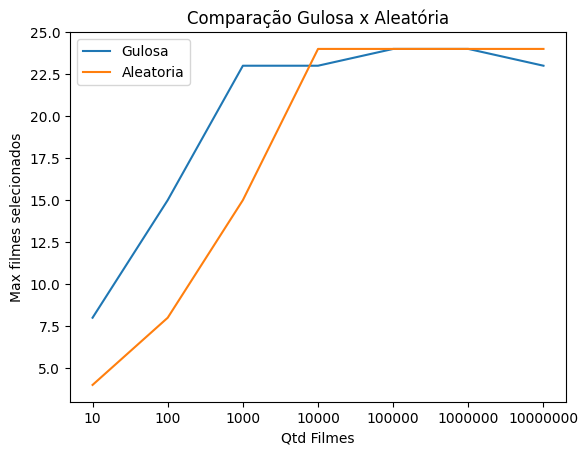

In [4]:
import matplotlib.pyplot as plt

x_labels = ["10", "100", "1000", "10000", "100000", "1000000", "10000000"]

# Plot the data
plt.plot(x_labels, gulosa, label="Gulosa")
plt.plot(x_labels, aleatoria, label="Aleatoria")

# Add labels and legend
plt.xlabel("Qtd Filmes")
plt.ylabel("Max filmes selecionados")
plt.title("Comparação Gulosa x Aleatória")
plt.legend()

# Show the plot
plt.show()

## Conclusões | Parte I:

Como podemos perceber, a heuristica aleatória performou um pouco pior que a heirística gulosa nos testes com menos filmes. Quando a quantidade de items é mais baixa, realmente é difícil prever quão bem a aleatória irá performar, pois ela só tem algumas opções, então ela pode ter o azar de selecionar opções ruins toda vez, ou ela pode ter bastante sorte e escolher o melhor logo de cara. Repetimos a execução do código 10 vezes aqui no jupyter, mas talvez para aumentar a performance podemos aumentar esse número para 100, por exemplo. Dessa maneira temos uma chance muito maior de acertar e obter os melhores resultados.

Quando se trata dos testes com maiores quantidades, era esperado que ambos fossem parecidos, já que temos um limite de 23 filmes (um por hora), haverá um limite onde ambas herurísticas encontram o valor ótimo, mesmo que sejam com filmes diferentes mas que tem a mesma duração.

# Parte II: Exaustiva e Parelização

Agora que já comparamos duas heurísticas, a gulosa e uma junção da gulosa com uma implementação aleatória, vamos partir para a impementação da busca exaustiva (checar todas possibilidades), e a implementação de dois tipos de parelização, com OpenMP e com GPU usando Thrust.

## Implementação exaustiva:

``` c++
void Exaustiva()
{
    int nfilmes, ncategorias, total, comp_total = 0;
    cin >> nfilmes >> ncategorias;

    vector<int> filmesPorCats, fpcReset;
    vector<filme> filmes;

    bitset<24> horas(0x0000000000000000000);

    bitset<64> bitsetFilmes(0);

    filmesPorCats.reserve(ncategorias);
    fpcReset.reserve(ncategorias);

    // TODO: PARALELIZAR
    for (int i=0; i<ncategorias; i++)
    {
        cin >> filmesPorCats[i];
        fpcReset[i] = filmesPorCats[i];
    }

    // TODO: PARALELIZAR
    for (int i=0; i<nfilmes; i++)
    {
        filme this_film;
        this_film.id = i;
        cin >> this_film.hInicio >> this_film.hFinal >> this_film.categoria;
        filmes.push_back(this_film);
    }

    
    // NOTE: Aqui é o for de 0 a 2^filmes - faz todas as possibilidades
    // TODO: PARALELIZAR

    for (int i=0;i<pow(2, nfilmes); i++)
    {
        total = 0;
        bitsetFilmes = i;
        horas = 0;

        for (int i=0; i<ncategorias; i++)
        {
            filmesPorCats[i] = fpcReset[i] ;
        }

        for (int j=0; j<nfilmes; j++)
        {            
            if (bitsetFilmes[j])
            {
                filme valor = filmes[j];
                
                if (valor.hInicio <= valor.hFinal){
                    if (filmesPorCats[valor.categoria] <= 0)
                    {
                        break;
                    }
                    bitset<24> mascara;
                    for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                        mascara.set(i);
                    }

                    // cout << "\nInicio: " << valor.hInicio << " Final: " << valor.hFinal;

                    bitset<24> resultado = horas & mascara;

                    if (resultado == 0)
                    {
                        for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                            horas.set(i);
                        }
                        filmesPorCats[valor.categoria]--;
                        total += 1;
                        // cout << "  > Iter - " << i << "   ID: " << valor.id << endl;
                    }
                }
            }
        }
        if (total > comp_total)
        {
            comp_total = total;
        }
    }

    cout << "\nTOTAL GLOBAL: " << comp_total << endl;
}
```

### Explicação:

Primeiro inicializamos um vetor com todos os filmes. Depois, criamos um bitset do tamanho da quantidade de filmes. Esse bitset representa os filmes escollhidos, então quando o valor for 1 significa que selecionamos o filme, caso seja 0 não o selecionamos. Aí passamos por todas as possibilidades verificando se ela respeita os horários e os filmes por categorias. Caso seja uma opção válida, guardamos o vlaor máximo e seguimos com o loop.

## Parelização:
## OpenMP:

```c++
void ParOPENMP()
{
    int nfilmes, ncategorias, comp_total = 0;
    cin >> nfilmes >> ncategorias;

    vector<int> filmesPorCats, fpcReset, total_values;
    vector<filme> filmes;

    filmesPorCats.resize(ncategorias);
    fpcReset.resize(ncategorias);

    // NOTE: Não paralelizavel pois possui o CIN
    for (int i=0; i<ncategorias; i++)
    {
        cin >> filmesPorCats[i];
        fpcReset[i] = filmesPorCats[i];
    }

    // NOTE: Não paralelizavel pois possui o CIN
    for (int i=0; i<nfilmes; i++)
    {
        filme this_film;
        this_film.id = i;
        cin >> this_film.hInicio >> this_film.hFinal >> this_film.categoria;
        filmes.push_back(this_film);
    }
    
    // NOTE: Aqui é o for de 0 a 2^filmes - faz todas as possibilidades
    int nExpo = pow(2, nfilmes);
 
    #pragma omp parallel for reduction(max : comp_total)
    for (int i=0;i<nExpo; i++)
    {
        bitset<24> horas(0x0000000000000000000);
        bitset<64> bitsetFilmes(0);
        vector<int> localfilmesPorCats;
        localfilmesPorCats.resize(ncategorias);

        int local_total_iteration = 0;
        bitsetFilmes = i;
        horas = 0;

        for (int i=0; i<ncategorias; i++)
        {
            localfilmesPorCats[i] = fpcReset[i] ;
        }

        // cout << omp_get_thread_num() << " " << i << endl;

        for (int j=0; j<nfilmes; j++)
        {            
            if (bitsetFilmes[j])
            {
                filme valor = filmes[j];
                
                if (valor.hInicio <= valor.hFinal){
                    if (localfilmesPorCats[valor.categoria] <= 0)
                    {
                        break;
                    }
                    bitset<24> mascara;
                    for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                        mascara.set(i);
                    }

                    // cout << "\nInicio: " << valor.hInicio << " Final: " << valor.hFinal;

                    bitset<24> resultado = horas & mascara;

                    if (resultado == 0)
                    {
                        for (int i = valor.hInicio; i <= valor.hFinal; i++) {
                            horas.set(i);
                        }
                        localfilmesPorCats[valor.categoria]--;
                        local_total_iteration += 1;
                        // cout << "  > Iter - " << i << "   ID: " << valor.id << endl;
                    }
                }
            }
        }
        if (local_total_iteration > comp_total)
        {
            comp_total = local_total_iteration;
        }
    }  

    cout << "\nTOTAL GLOBAL: " << comp_total << endl;
}
```

### Explicação:
Para a parelização com o OpenMP, precisamos selecionar cuidadosamente quais oportunidades valem a pena e quais não valem a pena tentar paralelizar. Se, por exemplo, um for não muito longo que faz push_back de variáveis em um vetor único, o código precisa ser feito de tal maneira a impedir acessos competitivos à uma mesma variável (diversas threads tentrem acessar o vetor simultaneamente), pois isso pode gerar o corrompimento de dados.

Dessa maneira, foi decidido paralelizar o loop principal apenas, pois é o que possui maior repetição. Além disso, o fizemos de tal forma a, cada thread reconhece a variável que guarda o maior número de filmes alcançado, e faz uma redução buscando o máximo e guardando-o na variável passada no #pragma, comp_total.


## Thrust:

## Valgrind

A partir do comando: `$ valgrind --tool=callgrind ./maratona2 < input.txt  > saida.txt`

Obtemos:

``` shell
==711741== Callgrind, a call-graph generating cache profiler
==711741== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==711741== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==711741== Command: ./maratona2
==711741== 
==711741== For interactive control, run 'callgrind_control -h'.
==711741== 
==711741== Events    : Ir
==711741== Collected : 1310171734
==711741== 
==711741== I   refs:      1,310,171,734
```

Comando callgrind_annotate: `$ callgrind_annotate callgrind.out.711741 maratona2.cpp`

Saída do annotate:

``` shell
  5,242,884      for (int i=0;i<pow(2, nfilmes); i++)
          .      {
  2,097,152          total = 0;
          .          bitsetFilmes = i;
  1,048,576          horas = 0;
          .  
 66,060,288          for (int i=0; i<ncategorias; i++)
          .          {
 83,886,080              filmesPorCats[i] = fpcReset[i] ;
          .          }
          .  
 62,773,248          for (int j=0; j<nfilmes; j++)
          .          {            
 40,132,608              if (bitsetFilmes[j])
          .              {
 20,066,304                  filme valor = filmes[j];
          .                  
 20,066,304                  if (valor.hInicio <= valor.hFinal){
 36,450,304                      if (filmesPorCats[valor.categoria] <= 0)
          .                      {
          .                          break;
          .                      }
 17,844,224                      bitset<24> mascara;
117,578,752                      for (int i = valor.hInicio; i <= valor.hFinal; i++) {
  8,922,112                          mascara.set(i);
          .                      }
          .  
          .                      // cout << "\nInicio: " << valor.hInicio << " Final: " << valor.hFinal;
          .  
          .                      bitset<24> resultado = horas & mascara;
          .  
 17,844,224                      if (resultado == 0)
          .                      {
 40,772,352                          for (int i = valor.hInicio; i <= valor.hFinal; i++) {
          .                              horas.set(i);
          .                          }
  6,928,128                          filmesPorCats[valor.categoria]--;
  6,928,128                          total += 1;
          .                          // cout << "  > Iter - " << i << "   ID: " << valor.id << endl;
          .                      }
          .                  }
          .              }
          .          }
  3,145,728          if (total > comp_total)
          .          {
          .              comp_total = total;
          .          }
          .      }
```

Podemos ver com clareza que quanto mais profundo nos loops aninhados que entramos, mais repetições estão nos loops de checagem: Por exemplo, a verificação e loop para setar a máscara de horário do filme, como é repetido para cada hora que o filme ocupa, pra todo filme, pra todas possibilidades, é o lugar onde mais ineficiênte.

Podemos ver claramente que a versão exaustiva é muito menos eficiente que ambas heurísticas testadas anteriormente, pois ela testa TODAS as combinações possíveis. Apesar de em questão de eficiência ela não ser boa, ela tem a garantia de encontrar o máximo. Outro ponto de comparação também é que para testarmos a exaustiva, dependemos de testes em menor escala, já que a cada filme a mais que colocamos (N sendo a quantidade de filmes), a complexidade do programa é exponencial, e portanto demora muito mais! Dessa maneira não conseguimos testar com os mesmos inputs que usamos pras outras heurísticas.

## Verificando tempo de execução para um mesmo arquivo:

Para a verificação de tempo, usamos o próprio arquivo de `input20.txt`, que possui 27 filmes e 20 categorias.

In [2]:
import subprocess
import time

with open('input20.txt') as f:
    # EXAUSTIVA
    print("Busca Exaustiva:")
    start = time.perf_counter()
    proc = subprocess.run(['./Exaustiva'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)
    print('\n')

with open('input20.txt') as f:
    # PARALELIZADO OPENMP
    print("OPENMP:")
    start = time.perf_counter()
    proc = subprocess.run(['./parOpenMP'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)
    print("\n")



with open('input20.txt') as f:
    # PARALELIZADO OPENMP
    print("THRUST:")
    start = time.perf_counter()
    proc = subprocess.run(['./parThrust'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Busca Exaustiva:
Saída: 
TOTAL GLOBAL: 6

Stderr: 
Tempo total(s): 32.09289514000011


OPENMP:
Saída: 
TOTAL GLOBAL: 6

Stderr: 
Tempo total(s): 12.60757027100044


THRUST:
Saída: 
Stderr: terminate called after throwing an instance of 'thrust::system::detail::bad_alloc'
  what():  std::bad_alloc: cudaErrorNoDevice: no CUDA-capable device is detected

Tempo total(s): 0.5464999160012667
